#### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

#### Importing dataset

In [2]:
df=pd.DataFrame()
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### No null values exist in the data

In [4]:
df.shape

(1338, 7)

#### 1338 records are available with 6 explanatory variables (age, sex, bmi, children, smoker, region)

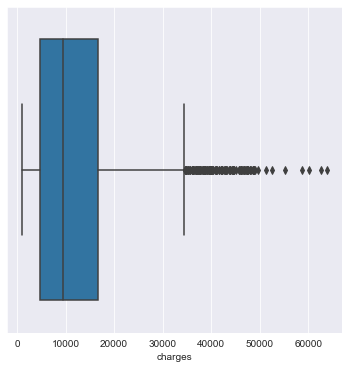

In [5]:
plt.figure(figsize=(6,6));
sns.boxplot(data=df,x='charges');

#### Charges are right skewed as more 75% of the charges are less than 20,000/= , outliers can also be seen from the box plot.

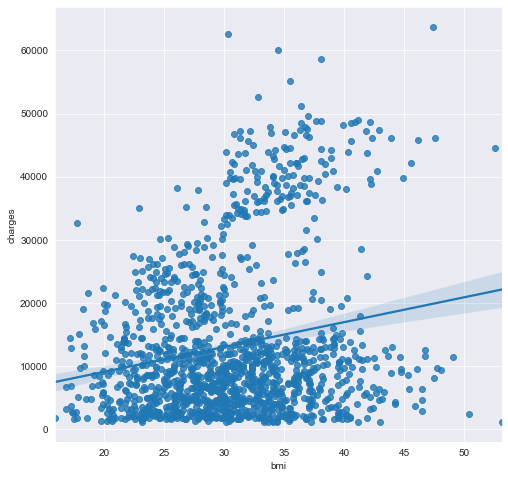

In [6]:
plt.figure(figsize=(8,8));
sns.regplot(data=df,x='bmi',y='charges');

Patients having bmi greater than or equal to 30 (obesity) tend to have greater count of charges higher than 20,000 hence indicating higher outliers. Whereas patients who are not obese (bmi<30) mostly tend to have less outliers. 

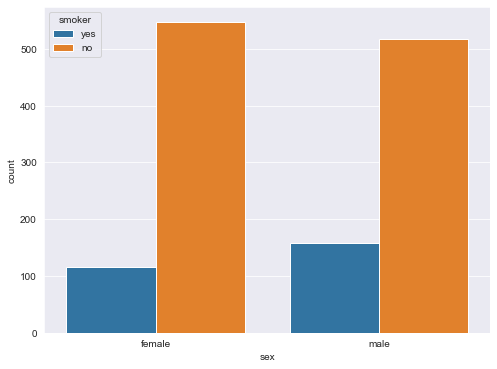

In [7]:
plt.figure(figsize=(8,6));
sns.countplot(data=df,x='sex',hue='smoker');

Majority of Male/Female are non-smoker. Gender ratio is not imbalanced, number of males are slightly higher than number of females.

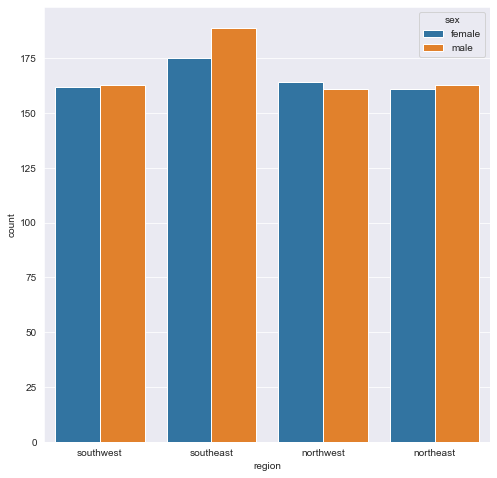

In [8]:
plt.figure(figsize=(8,8));
sns.countplot(data=df,x='region',hue='sex');

Gender Ratio is not imbalanced in any region and even the data as whole is not imbalanced in contrast with region.

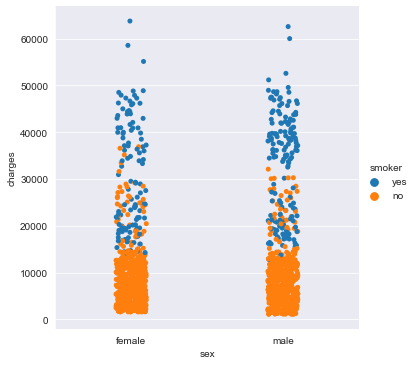

In [9]:
sns.catplot(data=df,x='sex',y='charges',hue='smoker');

Non-smokers have lower charges wheres for higher charges, male count is slightly greater.

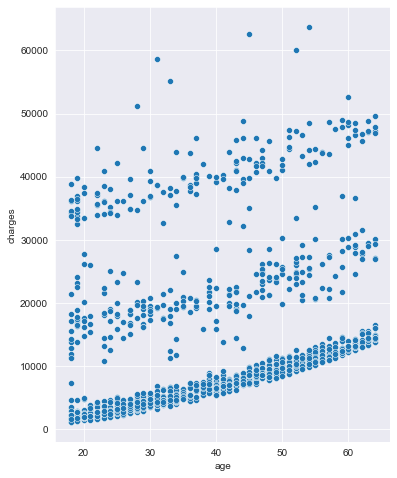

In [10]:
plt.figure(figsize=(6,8));
sns.scatterplot(data=df,x='age',y='charges');

#### A linear pattern can be seen between age and interval of charges. ADdults aged between 20-45 tend to have comparatively lower charges.

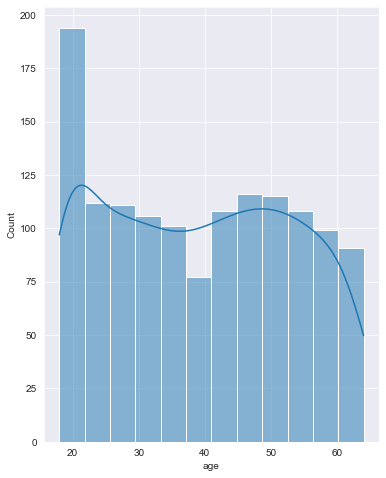

In [11]:
plt.figure(figsize=(6,8));
sns.histplot(data=df,x='age',kde=True);

#### Histogram highlights the shape of the age distribution

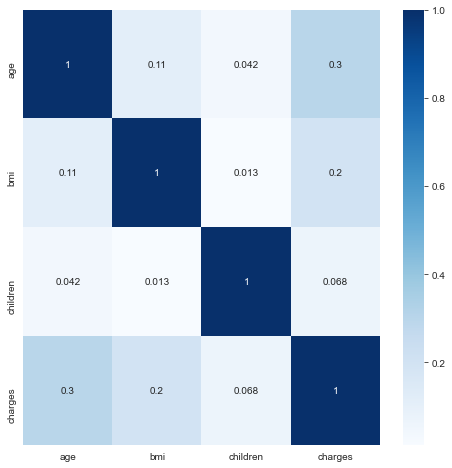

In [12]:
plt.figure(figsize=(8,8));
sns.heatmap(df.corr(),annot=True,cmap='Blues');

Explanatory variables such as Sex, smoker, region cannot be seen here as we haven't encoded them yet.

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
coder=LabelEncoder()
ohe=OneHotEncoder()

In [14]:
ohc=ohe.fit_transform(df['region'].values.reshape(-1,1)).toarray()

In [15]:
df_region=pd.DataFrame(ohc,columns=['Region' + str(ohe.categories_[0][i]) for i in range(len(ohe.categories_[0]))])
df=pd.concat([df_region,df],axis=1)

In [16]:
df.drop(['region','Regionsouthwest'],axis=1,inplace=True)
df.head()

,Regionnortheast,Regionnorthwest,Regionsoutheast,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,19,female,27.900,0,yes,16884.92400
1,0.0,0.0,1.0,18,male,33.770,1,no,1725.55230
2,0.0,0.0,1.0,28,male,33.000,3,no,4449.46200
3,0.0,1.0,0.0,33,male,22.705,0,no,21984.47061
4,0.0,1.0,0.0,32,male,28.880,0,no,3866.85520


We dropped one of the regions because we can represent the categories by 3 features instead of 4. Usually for Regression, we use N-1 features instead of N when using 'One Hot Encoder'. However for a classification problem, it is recommended to use all N features because most of the tree based algorithms use all variables.

In [17]:
df['sex']=coder.fit_transform(df['sex'])
df['smoker']=coder.fit_transform(df['smoker'])

In [18]:
df.head()

,Regionnortheast,Regionnorthwest,Regionsoutheast,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,19,0,27.900,0,1,16884.92400
1,0.0,0.0,1.0,18,1,33.770,1,0,1725.55230
2,0.0,0.0,1.0,28,1,33.000,3,0,4449.46200
3,0.0,1.0,0.0,33,1,22.705,0,0,21984.47061
4,0.0,1.0,0.0,32,1,28.880,0,0,3866.85520


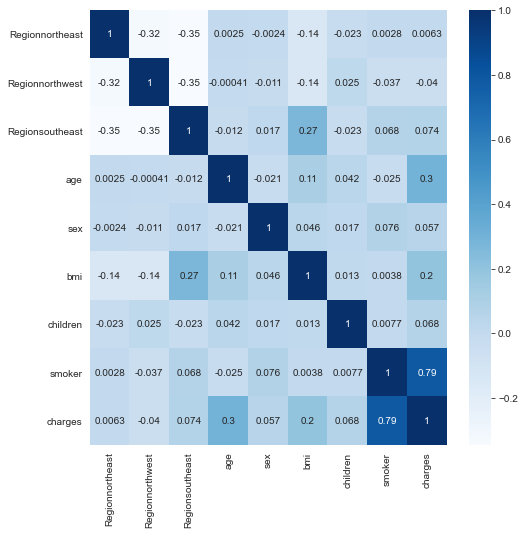

In [19]:
plt.figure(figsize=(8,8));
sns.heatmap(df.corr(),annot=True,cmap='Blues');

Now, we can see the correlation between all variables. Smoker seem to have a high correlation while Age and Bmi seem to be a useful explanatory variable as well.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Smoker feature has a high correlation with Charges. Let's try Linear Regression only with one feature 'Smoker'.

In [21]:
X=np.array(df['smoker'].copy()).reshape(-1,1)
y=df['charges'].copy()

In [22]:
LR=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)

LinearRegression()

In [23]:
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [23188.686]
Intercept: 8578.323


In [24]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.66
R^2 for Total Data: 0.62


In [25]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 52745964.728
MSE for training data: 56506970.26


#### R sqaure of 0.6 with only 1 feature is actually good, one might wonder that how a categorical variable can gave such a good R-sqaure, let's see

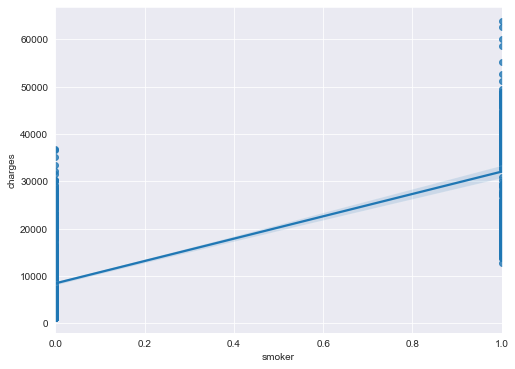

In [26]:
plt.figure(figsize=(8,6));
sns.regplot(data=df,x='smoker',y='charges');

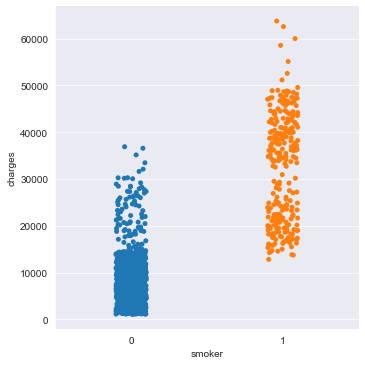

In [27]:
sns.catplot(data=df,x='smoker', y='charges');

#### The above two visualisations highlight that smoker variable makes a good distinction between charges. All patients with charges less than 10,000 are non-smokers, similarly, patients with charges higher than 15,000 are mostly smokers. As a results the regression lines fits the data well and gives a R-sqaure higher than 0.6.

Let's add bmi and age as features.

In [28]:
X=df[['smoker','bmi','age']].copy()
y=df['charges'].copy()

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [23675.372   326.45    259.41 ]
Intercept: -11707.802


In [30]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.778
R^2 for Total Data: 0.747


In [31]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 34512843.88
MSE for training data: 37638069.17


Scored improved significantly, now let's take all the features.

In [32]:
X=df.drop('charges',axis=1).copy()
y=df['charges'].copy()

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [ 8.0979900e+02  4.3912200e+02  1.5193500e+02  2.5697600e+02
 -1.8592000e+01  3.3709300e+02  4.2527900e+02  2.3651129e+04]
Intercept: -12741.018


In [34]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.784
R^2 for Total Data: 0.751


In [35]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 33596915.851
MSE for training data: 37277681.702


#### Sklearn is not the ideal library to be used for Linear Regression, Statsmodels library is better as it gives us addition information with the regression results such as P-values, skew & kurtosis residuals distribution, F-values, Durbin Watson Test, etc.

In [36]:
import statsmodels.api as sm

In [37]:
X=df.drop('charges',axis=1).copy()
y=df['charges'].copy()
X=sm.add_constant(X) # Statsmodel OLS do not add a constant to the regression line by default
ols=sm.OLS(y,X)
results=ols.fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:07:27   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
Regionnortheast   960.0510    477.933      2.009      0.045      22.466    1897.636
Regionnorthwest   607.0871    477.204      1.272      0.204    -329.068    1543.242
Regionsoutheast   -74.9711    470.639     -0.159      0.873    -998.247     848.305
age               256.8564     11.899     21.587      0.000     233.514     280.199
sex              -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi               339.1935     28.599     11.860      0.000     283.088     395.298
children          475.5005    137.804      3.451      0.001     205.163     745.838
smoker           2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Features Sex, Regionnorthwest and Regionsoutheast have p-values higher than0.05 due to which they will be removed.

In [39]:
X=df.drop(['charges','sex','Regionsoutheast','Regionnorthwest'],axis=1).copy()
y=df['charges'].copy()
X=sm.add_constant(X) # Statsmodel OLS do not add a constant to the regression line by default
ols=sm.OLS(y,X)
results=ols.fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     801.0
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:07:27   Log-Likelihood:                -13549.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.251e+04    963.375    -12.988      0.000   -1.44e+04   -1.06e+04
Regionnortheast   773.9462    390.709      1.981      0.048       7.473    1540.419
age               257.4058     11.885     21.657      0.000     234.090     280.722
bmi               329.4629     27.616     11.930      0.000     275.287     383.639
children          479.5142    137.674      3.483      0.001     209.432     749.596
smoker           2.381e+04    410.773     57.959      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      302.023   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.655
Skew:                           1.215   Prob(JB):                    9.81e-159
Kurtosis:                       5.674   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's check if the assumptions of Linear Regression can be validated in this dataset:

#### Let's start with Linearity

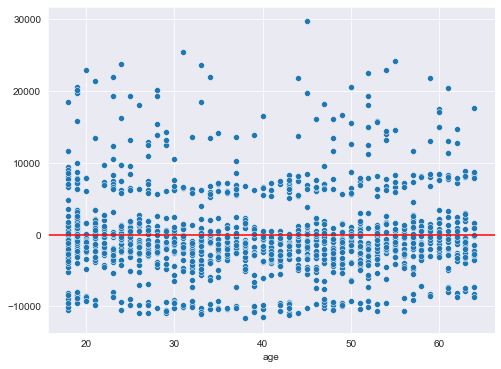

In [41]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=df['age'],y=results.resid);
plt.axhline(y = 0, color = 'r', linestyle = '-');

Residuals don't seem to be evenly spread out near the red horizontal line. However for a multiple linear plotting residuals may not be a good idea. Therefore scatterplots between dependent variable and explanatory variables can also be a good idea to check linearity (scatterplots of age, bmi and smoker with charges can be found above).

#### No Hetroskedasticity (constant error variance)

Let's perform Breusch-Pagan test

The null hypothesis (H0): Homoscedasticity is present

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [42]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 118.23673394503867),
 ('p-value', 7.4154724072287e-24),
 ('f-value', 25.82326161110925),
 ('f p-value', 6.05371443902562e-25)]

P-value is less than 0.05, hence Null hypothesis is rejected. We have sufficient evidence is say that hetroscedasticity is present. Therefore this assumption seems not to be valid in this reegression model.

#### Independent Error Terms (no auto-correlation)

Durbin-Watson Test: The Durbin Watson statistic is a test for autocorrelation in a data set. The DW statistic always has a value between zero and 4.0. A value of 2.0 means there is no autocorrelation detected in the sample. Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation.

As our value is near to 2 (see OLS Regression results), we can validate this assumption and conclude that no auto-correlation is present in our data.

#### Normality of Errors

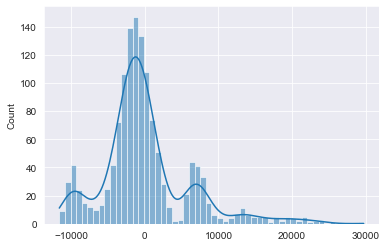

In [43]:
sns.histplot(x=results.resid,kde=True);

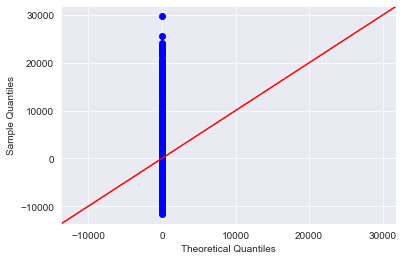

In [44]:
sm.qqplot(results.resid,line='45');

As the plot shows, the regression models doesn't seem to follow this assumption. Skew and Kurtosis from OLS Regression results are also a proof of that, normal distribution have a skew of 0 and kurtosis of 3 while the values in results are significantly different.

#### No multicollinearity

Going back to the heatmap, no significant correlation can be seen among the explanatory variables. Hence, this assumption also validates.